Reading List

<https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python>

<http://cermics.enpc.fr/scilab_new/site/Tp/MonteCarlo/black-scholes/black-scholes.html>



In [15]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

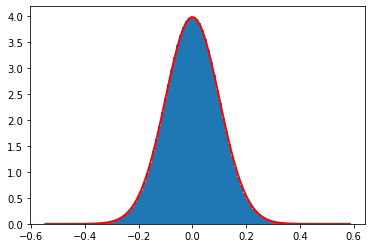

In [16]:
N = 10000000
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, N)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [17]:
import numpy as np
import math
import time

class OptionPricing:

	def __init__(self,S0,E,T,rf,sigma,iterations):

		self.S0 = S0
		self.E = E
		self.T = T
		self.rf = rf
		self.sigma = sigma
		self.iterations = iterations

	def call_option_simulation(self):

		option_data = np.zeros([self.iterations, 2])
		rand = np.random.normal(0,1, [1, self.iterations])
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2) + self.sigma * np.sqrt(self.T) * rand)
		option_data[:,1] = stock_price - self.E

		# average for the Monte Carlo Method
		average = np.sum(np.amax(option_data, axis = 1))/float(self.iterations)

		return np.exp(-1.0*self.rf*self.T) * average

	def put_option_simulation(self):

		option_data = np.zeros([self.iterations,2])
		rand = np.random.normal(0,1,[1,self.iterations])
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2) + self.sigma * np.sqrt(self.T) * rand)
		option_data[:,1] = self.E - stock_price

		# average for the Monte Carlo Method
		average = np.sum(np.amax(option_data, axis = 1))/float(self.iterations)

		return np.exp(-1.0*self.rf*self.T) * average

if __name__ == "__main__":

	S0=20					#underlying
	E=21				#strike
	T=4/12						#time to maturity
	rf=0.1				#risk-free interest rate
	sigma=0.3			#volatility of the underlying
	iterations=1000000		#number of Monte Carlo iterations

	model = OptionPricing(S0,E,T,rf,sigma,iterations)
	print("Call option price with Monte Carlo approach: ", model.call_option_simulation())
	print("Put option price with Monte Carlo approach: ", model.put_option_simulation())

Call option price with Monte Carlo approach:  1.2437923652743068
Put option price with Monte Carlo approach:  1.5494295116462191


Text(0.5, 1.0, 'Geometric Brownian Motion')

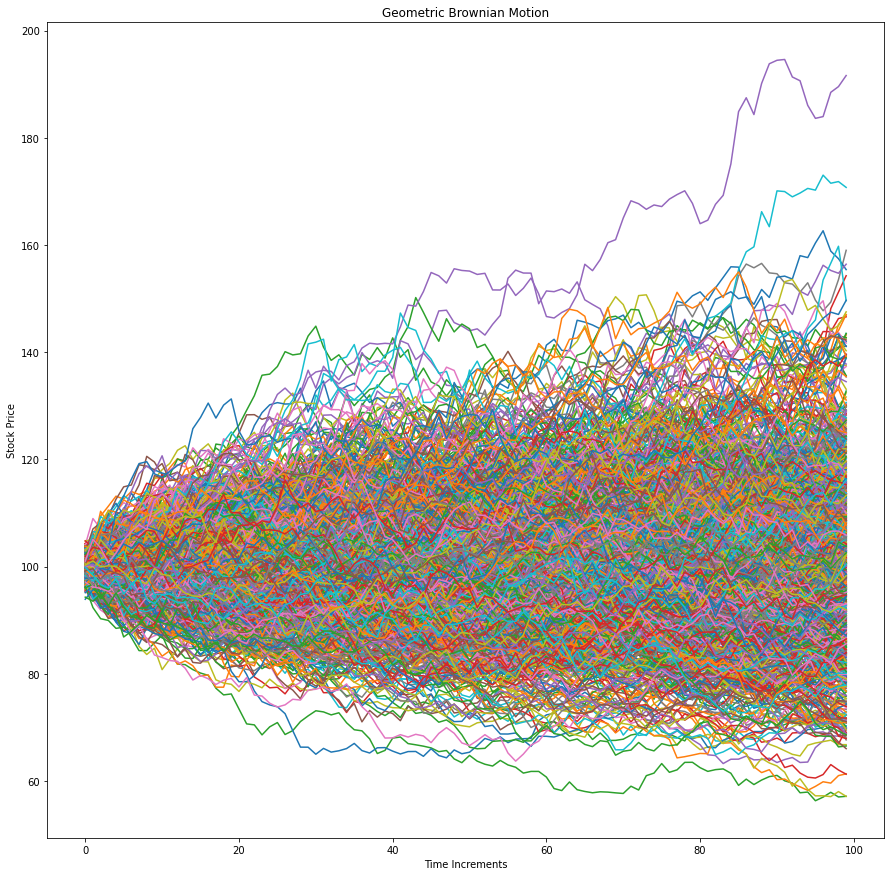

In [38]:
# https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python

import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.figure(figsize=(15,15))
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")